# Siatki strukturalne

In [9]:
import math
import numpy as np
from matplotlib import pyplot as plt

### Klasa Point

In [10]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def draw(self, color: str):
        plt.scatter(self.x, self.y, color=color)  # plotting single point

    def print(self):
        print(self.x,self.y)

### Klasa Line

In [11]:
class Line:
    def __init__(self, head: Point, tail: Point):
        self.head = head
        self.tail = tail
        self.calculateFunction()
    
    def length(self):
        return math.sqrt(math.pow(self.head.x-self.tail.x,2)+math.pow(self.head.y-self.tail.y,2))

    def calculateFunction(self):
        if (self.head.x-self.tail.x) != 0:
            self.a = (self.head.y - self.tail.y)/(self.head.x-self.tail.x)
            self.b = self.head.y - self.a * self.head.x
        else:
            self.a = None
            self.b = self.head.x

    def draw(self, color):
        plt.plot([self.head.x,self.tail.x], [self.head.y,self.tail.y], linestyle="-", color = color)
    
    def returnX(self, y):
        if self.a == None:
            return self.b
        else:
            return (y-self.b)/self.a

### Klasa Figure

In [12]:
class Figure:
    def __init__(self, points, X, Y):
        self.elX = 1 #default element height
        self.elY = 1 #default element width
        self.X = X
        self.Y = Y

        points.sort(key=lambda p: p.x)
        points.sort(key=lambda p: p.y, reverse=True)
        
        self.LT = points[0]
        self.RT = points[1]
        self.LB = points[2]
        self.RB = points[3]

        self.Top = Line(self.LT, self.RT)
        #self.Top.draw("b")
        self.Bottom = Line(self.LB, self.RB)
        #self.Bottom.draw("r")
        self.Left = Line(self.LT, self.LB)
        #self.Left.draw("g")
        self.Right = Line(self.RT, self.RB)
        #self.Right.draw("y")

        self.makePoints()
    

    def drawPoints(self):
        for p in range(len(self.meshPoints)):
            self.meshPoints[p].draw("b")
            #plt.annotate(p, (self.meshPoints[p].x, self.meshPoints[p].y))


    def makePoints(self):
        self.meshPoints = []
        while self.X * self.elX > self.Bottom.length()*1.5:
            self.elX/=2
        while self.X * self.elX*1.5 < self.Bottom.length():
            self.elX*=2
        while self.Y * self.elY > self.Left.length()*1.5:
            self.elX/=2
        while self.Y * self.elY*1.5 < self.Left.length():
            self.elY*=2


        endY = self.Top.tail.y            
        tempY = self.Bottom.tail.y
        y = 0
        while y <= self.Y:
            x=0
            tempX = self.Left.returnX(tempY)
            endX = self.Right.returnX(tempY) 
            while x <= self.X:
                self.meshPoints.append(Point(float(tempX),float(tempY)))
                elX = self.elX
                if tempX + self.elX >= endX:
                    if (self.X-x) != 0:
                        elX = (endX - tempX)/(self.X-x)
                tempX += elX
                if x+1 == self.X:
                    tempX = endX
                x += 1

            elY = self.elY
            if tempY + elY >= endY:
                if (self.Y-y) != 0:
                    elY = (endY - tempY)/(self.Y-y)
            tempY += elY
            if y+1 == self.Y:
                tempY = endY
            y += 1

        self.drawPoints()
    
    def generateRectangleMesh(self, file):
        self.meshPoints.sort(key=lambda p: p.x)
        self.meshPoints.sort(key=lambda p: p.y)
        for i in range(len(self.meshPoints)-1):
            if (i+1)%(self.X+1) != 0:
                Line(self.meshPoints[i],self.meshPoints[i+1]).draw("green")
        for i in range(len(self.meshPoints)-1):
            if i < (self.X+1)*(self.Y):
                Line(self.meshPoints[i],self.meshPoints[i+self.X+1]).draw("green")
        self.exportRec(file)

    def generateTriangleMesh(self, file):
        self.generateRectangleMesh(file)
        for i in range(len(self.meshPoints)-1):
            if i < (self.X+1)*(self.Y) and (i+1)%(self.X+1) != 0:
                Line(self.meshPoints[i],self.meshPoints[i+self.X+2]).draw("blue")
        self.exportTri(file)
        
    def exportRec(self, file):
        f = open(file, "w")
        f.write("Nodes:\n")
        for i in self.meshPoints:
            f.write("{} {}\n".format(round(i.x,2), round(i.y,2)))

        f.write("\nElements:\n")
        for i in range(len(self.meshPoints)-1):
            if i < (self.X+1)*(self.Y) and (i+1)%(self.X+1) != 0:
                f.write("{} {} {} {}\n".format(i,i+1,i+self.X+1,i+self.X+2))
        
        f.close()

    def exportTri(self, file):
        f = open(file, "w")
        f.write("Nodes:\n")
        for i in self.meshPoints:
            f.write("{} {}\n".format(round(i.x,2), round(i.y,2)))

        f.write("\nElements:\n")
        for i in range(len(self.meshPoints)-1):
            if i < (self.X+1)*(self.Y) and (i+1)%(self.X+1) != 0:
                f.write("{} {} {}\n".format(i,i+self.X+1,i+self.X+2))
                f.write("{} {} {}\n".format(i,i+1,i+self.X+2))
        
        f.close()


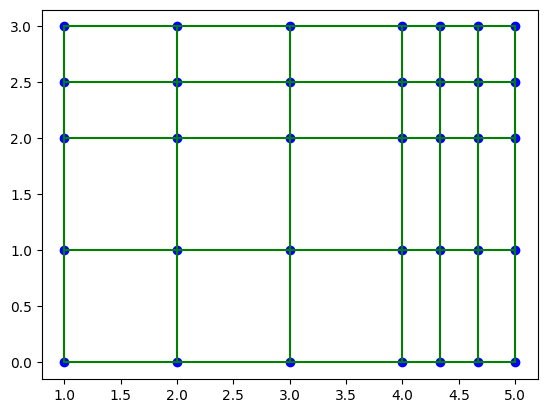

In [13]:
a = np.genfromtxt("rectangle.txt", delimiter=" ", usemask=True)

pointsList=[]
for i in a:
    pointsList.append(Point(i[0],i[1]))

if len(pointsList) == 4:
    f1 = Figure(pointsList, 6, 4)
    f1.generateRectangleMesh("rec.txt")
    #f1.generateTriangleMesh("rec.txt")

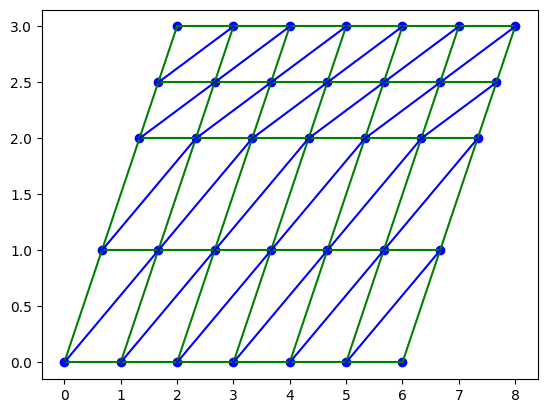

In [14]:
a = np.genfromtxt("figura1.txt", delimiter=" ", usemask=True)
pointsList=[]
for i in a:
    pointsList.append(Point(i[0],i[1]))

f2 = Figure(pointsList, 6, 4)
f2.generateTriangleMesh("f1.txt")

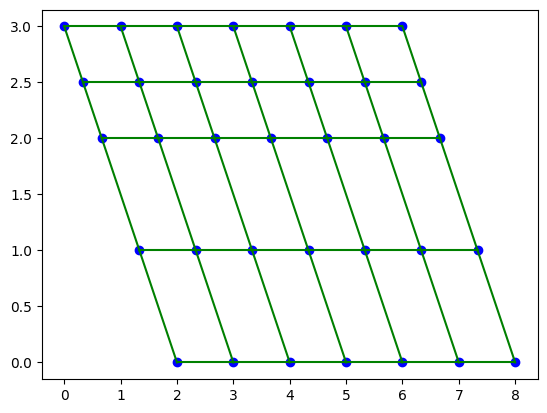

In [15]:
a = np.genfromtxt("figura2.txt", delimiter=" ", usemask=True)
pointsList=[]
for i in a:
    pointsList.append(Point(i[0],i[1]))

f2 = Figure(pointsList, 6, 4)
f2.generateRectangleMesh("f2.txt")

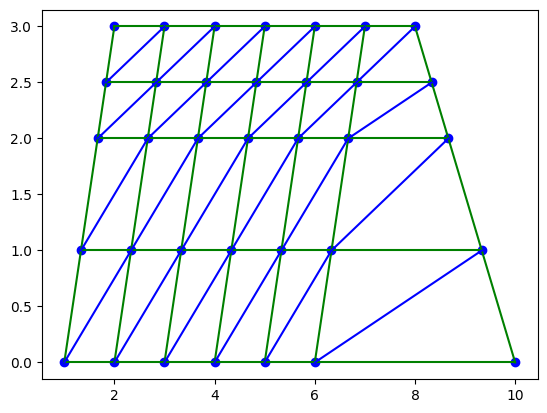

In [16]:
a = np.genfromtxt("trapeze.txt", delimiter=" ", usemask=True)
pointsList=[]
for i in a:
    pointsList.append(Point(i[0],i[1]))

f2 = Figure(pointsList, 6, 4)
f2.generateTriangleMesh("tra.txt")